In [18]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Matplotlibで日本語を表示するための設定
# 環境に応じてインストールされているフォントに適宜変更してください
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Hiragino Sans', 'Yu Gothic', 'Meiryo', 'TakaoPGothic', 'IPAexGothic', 'Noto Sans CJK JP']

# JSONファイルの読み込み
file_path = 'outputs/cleaned_toshin_data.json'
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)

# 日付関連の列をdatetime型に変換
df['諮問日_iso'] = pd.to_datetime(df['諮問日_iso'], errors='coerce')
df['答申日_iso'] = pd.to_datetime(df['答申日_iso'], errors='coerce')

print("データの読み込みが完了しました。")

データの読み込みが完了しました。


In [19]:
import json # jsonライブラリをインポート

# 元データ（クリーニング前）を読み込む
original_file_path = 'outputs/toshin_data.json'
with open(original_file_path, 'r', encoding='utf-8') as f:
    original_data = json.load(f)

# URLをキーとして、元の「委員」フィールドの内容を保持する辞書を作成
url_to_original_committee = {item.get('URL'): item.get('委員', 'N/A') for item in original_data}

# 案件数が1回の委員のリストを再作成
all_members = [member for sublist in df['委員'].dropna() for member in sublist]
member_counts = Counter(all_members)
unique_members = {member for member, count in member_counts.items() if count == 1}

print(f"担当案件数が1回のみの委員（またはノイズ候補）と、その出典情報をRAW形式で表示します。\n---")

found_count = 0
for index, row in df.iterrows():
    if not isinstance(row['委員'], list):
        continue

    found_members = set(row['委員']).intersection(unique_members)
    
    if found_members:
        for member in found_members:
            original_committee_field = url_to_original_committee.get(row['URL'], "元データにURLが見つかりません")
            
            # --- ここからが出力形式の修正部分 ---
            
            # json.dumpsを使い、文字列をエスケープ処理されたJSON文字列値に変換
            # これにより、\n や " などがそのままの文字として表示される
            json_formatted_string = json.dumps(original_committee_field, ensure_ascii=False)
            
            print(f"■■■ ノイズ検出 ■■■")
            print(f"URL                 : {row['URL']}")
            print(f"抽出されたノイズ候補: {member}")
            print(f"元データのRAW文字列 :")
            print(f'    "委員": {json_formatted_string}\n')
            # --- ここまでが出力形式の修正部分 ---
            
            found_count += 1

print(f"--- \n合計 {found_count} 件のユニークな委員（候補）が見つかりました。")

担当案件数が1回のみの委員（またはノイズ候補）と、その出典情報をRAW形式で表示します。
---
■■■ ノイズ検出 ■■■
URL                 : https://koukai-hogo-db.soumu.go.jp/reportBody/13167
抽出されたノイズ候補: ]渡井理佳子
元データのRAW文字列 :
    "委員": "委員　岡島敦子，委員　葭葉裕子，委員　]渡井理佳子"

■■■ ノイズ検出 ■■■
URL                 : https://koukai-hogo-db.soumu.go.jp/reportBody/16216
抽出されたノイズ候補: 木村琢麿'font-family:"ＭＳゴシック"'>
元データのRAW文字列 :
    "委員": "委員　合田悦三，委員　木村琢麿'font-family:\"ＭＳ ゴシック\"'>，委員　中村真由美"

■■■ ノイズ検出 ■■■
URL                 : https://koukai-hogo-db.soumu.go.jp/reportBody/222
抽出されたノイズ候補: 吉村德則,高木佳子,戸松秀典
元データのRAW文字列 :
    "委員": "吉村德則,高木佳子,戸松秀典"

■■■ ノイズ検出 ■■■
URL                 : https://koukai-hogo-db.soumu.go.jp/reportBody/223
抽出されたノイズ候補: の弁護士登録の日付について
元データのRAW文字列 :
    "委員": "委員の弁護士登録の日付について"

■■■ ノイズ検出 ■■■
URL                 : https://koukai-hogo-db.soumu.go.jp/reportBody/2385
抽出されたノイズ候補: 「米国のＢＳＥ汚染は平成５年から始まっていた可能性が高い」「日本で対策がとられる平成１３年までに
元データのRAW文字列 :
    "委員": "委員長の２月２１日に東京都内で開かれた国際シンポジウムでの発言，「米国のＢＳＥ汚染は平成５年から始まっていた可能性が高い」「日本で対策がとられる平成１３年までに，リスクの高い牛製品が東アジア地域に輸出され

In [4]:
print("■ データフレームの基本情報")
df.info()

■ データフレームの基本情報
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16973 entries, 0 to 16972
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   URL           16973 non-null  object        
 1   諮問庁           16973 non-null  object        
 2   事件名           16973 non-null  object        
 3   諮問日_iso       16968 non-null  datetime64[ns]
 4   答申日_iso       16967 non-null  datetime64[ns]
 5   委員            16973 non-null  object        
 6   summary_text  16973 non-null  object        
 7   detail_texts  16973 non-null  object        
dtypes: datetime64[ns](2), object(6)
memory usage: 1.0+ MB


In [5]:
print("\n■ データフレームの先頭5行")
df.head()


■ データフレームの先頭5行


,URL,諮問庁,事件名,諮問日_iso,答申日_iso,委員,summary_text,detail_texts
0,https://koukai-hogo-db.soumu.go.jp/reportBody/...,防衛大臣,基礎情報隊が作成した情報資料及び当該記事一覧の一部開示決定に関する件,2024-06-06,2025-06-27,"[中村真由美, 中里智美, 木村琢麿]",事件名：基礎情報隊が作成した情報資料及び当該記事一覧の一部開示決定に関する件\n諮問庁：防衛...,{'第２_審査請求人の主張の要旨': '1 審査請求の趣旨 行政機関の保有する情報の公開に関...
1,https://koukai-hogo-db.soumu.go.jp/reportBody/...,防衛大臣,本人に係る「適格証明書受領・返却簿」の一部開示決定に関する件,2024-01-11,2025-06-27,"[佐藤郁美, 武藤京子, 寺田麻佑]",事件名：本人に係る「適格証明書受領・返却簿」の一部開示決定に関する件\n諮問庁：防衛大臣\n...,{'第２_審査請求人の主張の要旨': '1 審査請求の趣旨 個人情報の保護に関する法律(以下...
2,https://koukai-hogo-db.soumu.go.jp/reportBody/...,防衛大臣,イラク派遣部隊（陸自及び空自双方）のいわゆる「日報」を受領した部局におけるその処理及び管理に...,2024-12-19,2025-06-27,"[中村真由美, 中里智美, 木村琢麿]",事件名：イラク派遣部隊（陸自及び空自双方）のいわゆる「日報」を受領した部局におけるその処理及...,{'第２_審査請求人の主張の要旨': '1 審査請求の趣旨 行政機関の保有する情報の公開に関...
3,https://koukai-hogo-db.soumu.go.jp/reportBody/...,防衛大臣,日米物品役務相互提供業務の参考の一部開示決定に関する件,2024-01-18,2025-06-27,"[佐藤郁美, 武藤京子, 寺田麻佑]",事件名：日米物品役務相互提供業務の参考の一部開示決定に関する件\n諮問庁：防衛大臣\n\n結...,{'第２_審査請求人の主張の要旨': '1 審査請求の趣旨 行政機関の保有する情報の公開に関...
4,https://koukai-hogo-db.soumu.go.jp/reportBody/...,外務大臣,「３文書や防衛力の抜本的強化について」の議論に関し行政文書ファイル等につづられた文書の一部開...,2024-11-28,2025-06-27,"[佐藤郁美, 武藤京子, 寺田麻佑]",事件名：「３文書や防衛力の抜本的強化について」の議論に関し行政文書ファイル等につづられた文書...,{'第２_審査請求人の主張の要旨': '1 審査請求の趣旨 行政機関の保有する情報の公開に関...


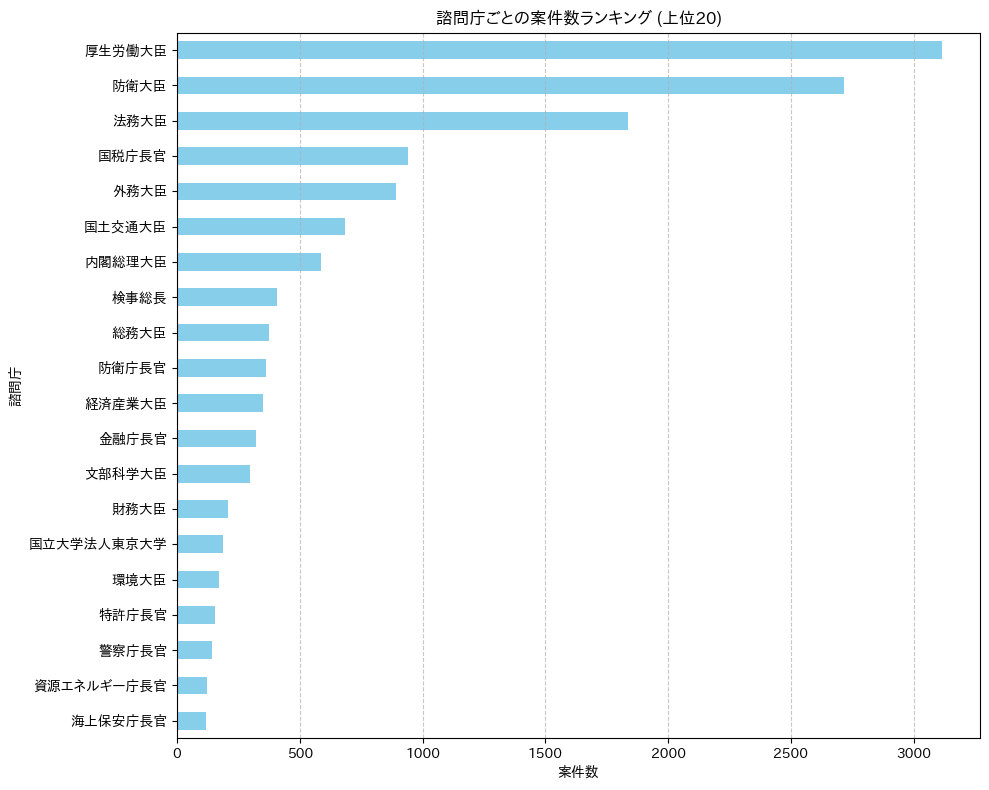

In [6]:
agency_counts = df['諮問庁'].value_counts().nlargest(20)

plt.figure(figsize=(10, 8))
agency_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('諮問庁ごとの案件数ランキング (上位20)')
plt.xlabel('案件数')
plt.ylabel('諮問庁')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

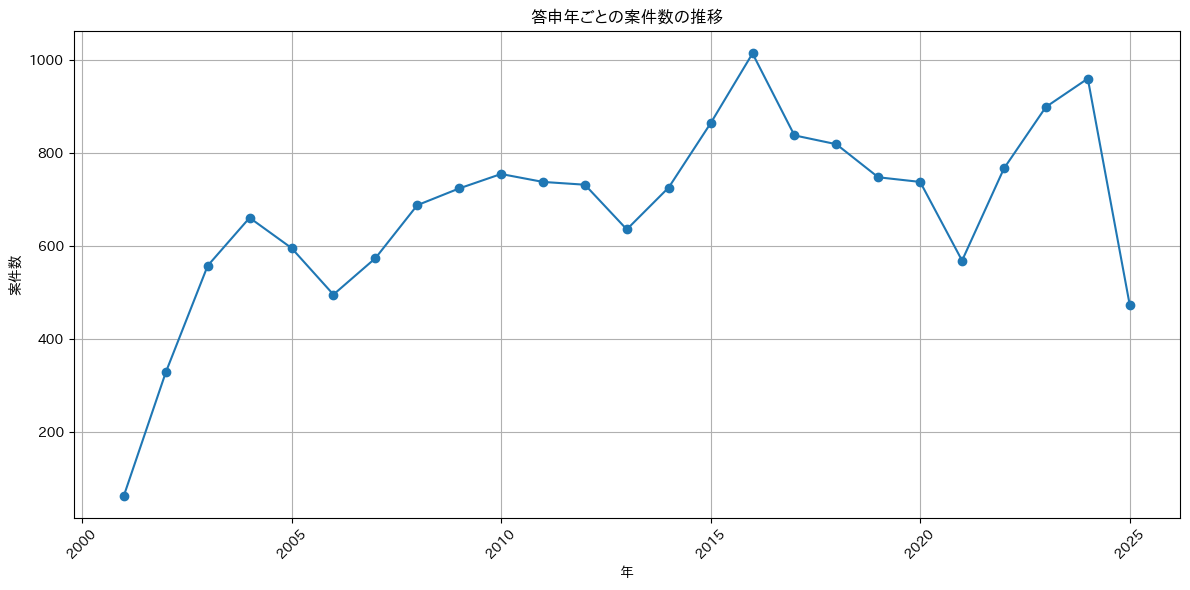

In [7]:
df['答申年'] = df['答申日_iso'].dt.year
yearly_counts = df['答申年'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line', marker='o', linestyle='-')
plt.title('答申年ごとの案件数の推移')
plt.xlabel('年')
plt.ylabel('案件数')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

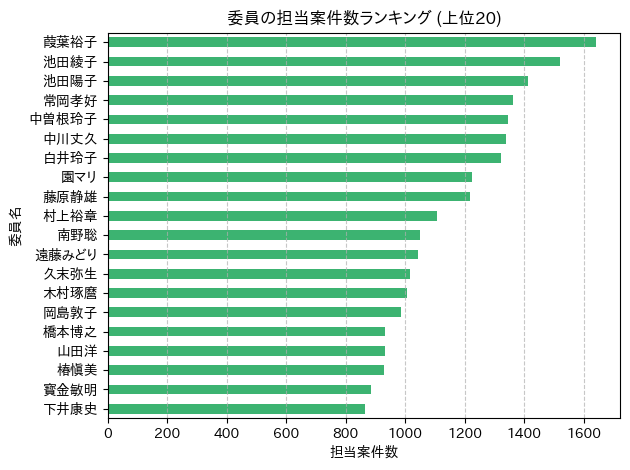

In [8]:
# '委員'列のデータをフラットなリストに変換
all_members = [member for sublist in df['委員'].dropna() for member in sublist]

member_counts = Counter(all_members).most_common(20)

# Counterの結果をDataFrameに変換して可視化
df_members = pd.DataFrame(member_counts, columns=['委員名', '担当案件数'])

plt.figure(figsize=(10, 8))
df_members.sort_values(by='担当案件数').plot(kind='barh', x='委員名', y='担当案件数', legend=False, color='mediumseagreen')
plt.title('委員の担当案件数ランキング (上位20)')
plt.xlabel('担当案件数')
plt.ylabel('委員名')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()